In [ ]:
import numpy as np
import pandas as pd
import seaborn

In [ ]:

t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


• How many passengers are described in the data set?

In [ ]:
passenger_count = t.shape[0]
print("The number of passengers described in the dataset is:", passenger_count)

The number of passengers described in the dataset is: 891


•How many distinct values are in who column?

In [ ]:
distinct_values = t['who'].nunique() #who' column represent the types of passengers in titanic
print("The number of distinct values in the 'who' column is:", distinct_values)

The number of distinct values in the 'who' column is: 3


• How many missing values do you find in each data column?

In [ ]:
missing_values = t.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


•Does the data contain passengers over 60 old? How many?

In [ ]:
#identify passengers with an age greater than 60 and count
passengers_over_60 = t[t['age'] > 60]
number_of_passengers_over_60 = len(passengers_over_60)

if number_of_passengers_over_60 > 0:
    print("Yes, there are passengers over 60 years old in the dataset.")
    print("Number of passengers over 60 years old:", number_of_passengers_over_60)
else:
    print("No passengers over 60 years old found in the dataset.")

Yes, there are passengers over 60 years old in the dataset.
Number of passengers over 60 years old: 22



• What is the passenger age distribution? (Plot it.)

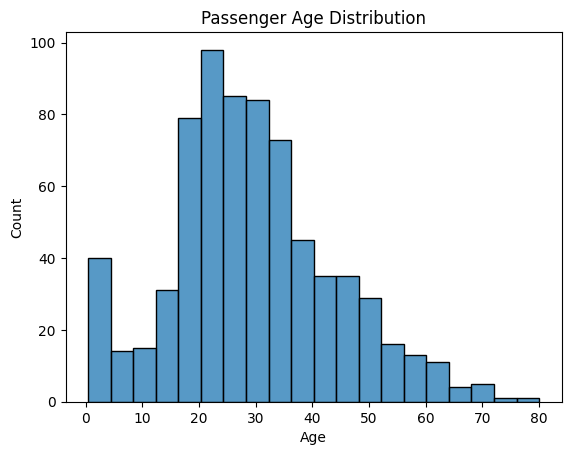

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the passenger age distribution
sns.histplot(data=t, x='age', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()

• What are the 3-quantiles of the passenger age distribution?

(Finite samples are divided into q subsets of nearly equal sizes by q-quantiles. The 2-
quantile is the median.)

In [ ]:

#3-quantiles of the passenger age distribution.
quantiles = t['age'].quantile([0.25, 0.5, 0.75])
print("1st Quantile (25th percentile):", quantiles[0.25])
print("2nd Quantile (50th percentile - Median):", quantiles[0.5])
print("3rd Quantile (75th percentile):", quantiles[0.75])

1st Quantile (25th percentile): 20.125
2nd Quantile (50th percentile - Median): 28.0
3rd Quantile (75th percentile): 38.0



• How will you drop all passengers with no embarked data?

In [ ]:
#To drop all passengers with no embarked data in the Titanic
t = t.dropna(subset=['embarked'])


• What is the average, minimum, and maximum fares paid by the passengers?

In [ ]:

#calculate the average, minimum, and maximum fares paid
average_fare = t['fare'].mean()
minimum_fare = t['fare'].min()
maximum_fare = t['fare'].max()

print("Average Fare:", average_fare)
print("Minimum Fare:", minimum_fare)
print("Maximum Fare:", maximum_fare)

Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292



• What are the proportions of passengers in different classes?

In [ ]:
#calculate the proportions of passengers in different classes
class_proportions = t['class'].value_counts(normalize=True)
print("Proportions of passengers in different classes:")
print(class_proportions)

Proportions of passengers in different classes:
Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64



• What is the female to male ratio in each travel class?

In [ ]:
# "class" and "sex" columns and count the number of passengers in each group
class_sex_counts = t.groupby(['class', 'sex']).size().unstack()

# Calculate the female-to-male ratio for each class
class_sex_ratios = class_sex_counts['female'] / class_sex_counts['male']

print("Female-to-Male Ratios in Each Travel Class:")
print(class_sex_ratios)

Female-to-Male Ratios in Each Travel Class:
class
First     0.754098
Second    0.703704
Third     0.414986
dtype: float64



• What fraction survived?
(This fraction is sometimes called the survival rate - although it is an improper name in the
sense that there is no “rate” to speak of here; the question is to compute a dimensionless
fraction.)

In [ ]:
#calculate the fraction of passengers who survived in the Titanic
survival_fraction = t['survived'].mean()
print("Fraction of passengers who survived:", survival_fraction)

Fraction of passengers who survived: 0.38245219347581555



• Are the survival rates of male and female passengers different?

In [ ]:
# Group the data by gender and calculate the survival rates
survival_rates_by_gender = t.groupby('sex')['survived'].mean()

print("Survival Rates by Gender:")
print(survival_rates_by_gender)

Survival Rates by Gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [ ]:

# Check if the survival rates are different
if survival_rates_by_gender['male'] != survival_rates_by_gender['female']:
    print("Survival rates of male and female passengers are different.")
else:
    print("Survival rates of male and female passengers are the same.")

Survival rates of male and female passengers are different.




• Are the survival rates of frst, second, and third class passengers different?

In [ ]:
# Group the data by passenger class and calculate the survival rates
survival_rates_by_class = t.groupby('class')['survived'].mean()

print("Survival Rates by Passenger Class:")
print(survival_rates_by_class)

Survival Rates by Passenger Class:
class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [ ]:
# Check if the survival rates are different
if (survival_rates_by_class['First'] != survival_rates_by_class['Second']) or (survival_rates_by_class['First'] != survival_rates_by_class['Third']):
    print("Survival rates of first, second, and third-class passengers are different.")
else:
    print("Survival rates of first, second, and third-class passengers are the same.")

Survival rates of first, second, and third-class passengers are different.



• How can one print a table of survival rate dependencies on class and gender?

In [ ]:
# Create a table with class and gender as columns and survival rate as values
survival_table = t.pivot_table(values='survived', index='class', columns='sex', aggfunc='mean')

# Name the columns for clarity
survival_table.columns = ['Female Survival Rate', 'Male Survival Rate']

print("Survival Rate Dependencies on Class and Gender:")
print(survival_table)

Survival Rate Dependencies on Class and Gender:
        Female Survival Rate  Male Survival Rate
class                                           
First               0.967391            0.368852
Second              0.921053            0.157407
Third               0.500000            0.135447



• How can one print a table with number of survivors and average fare for each gender
and cabin?

In [ ]:
# Create a table with gender and cabin as columns, survivors and average fare as values
survival_fare_table = t.pivot_table(values=['survived', 'fare'], index=['sex', 'class'], aggfunc={'survived': 'sum', 'fare': 'mean'})

# Name the columns for clarity
survival_fare_table.columns = ['Number of Survivors', 'Average Fare']

print("Table with Number of Survivors and Average Fare for Each Gender and Cabin:")
print(survival_fare_table)

Table with Number of Survivors and Average Fare for Each Gender and Cabin:
               Number of Survivors  Average Fare
sex    class                                    
female First            106.693750            89
       Second            21.970121            70
       Third             16.118810            72
male   First             67.226127            45
       Second            19.741782            17
       Third             12.661633            47
